In [1]:
import pandas as pd

# Constructing our matrix of frequented Regions by strain

In [58]:
rawDf = pd.read_csv("../../data/100YeastGenomesCombinedHardMasked.gtet300bps.k300.graph.dot-100YeastGenomesCombinedHardMasked.gtet300bps.fna-a0.8-kp0-sup5-sz1.bed", delimiter="\t", header=None)
#rawDf = rawDf[[0,3]]

In [59]:
rawDf.shape

(11273908, 10)

In [60]:
seqText = rawDf[0].values

In [61]:
textSplitLen = [len(text.split()) for text in seqText]

In [ ]:
textSplit = [text.split() for text in seqText]

In [ ]:
strain = []
for text in textSplit:
    if len(text) == 1:
        strain.append(text[0].split(".")[0])
    else:
        #strain.append(text[text.index("cerevisiae") + 1])
        strainName = text[text.index("cerevisiae") + 1]
        strain.append(strainName.split("-")[0])

In [ ]:
strainLower = [text.lower() for text in strain]

In [ ]:
frNums = [int(text.split("-")[1]) for text in rawDf[3].values]

In [ ]:
df = pd.DataFrame({"Strain": strainLower, "FrNum": frNums})

In [ ]:
len(set(frNums))

In [53]:
dfMeow = df.groupby(df.columns.tolist(),as_index=False).size().reset_index(name = 'counts')

In [54]:
dfPivot = dfMeow.pivot(index = "Strain", columns = "FrNum", values="counts").fillna(0)


In [55]:
dfPivot.columns

Int64Index([   0,    1,    2,    3,    4,    5,    6,    7,    8,    9,
            ...
            5220, 5221, 5222, 5223, 5224, 5225, 5226, 5227, 5228, 5229],
           dtype='int64', name='FrNum', length=5230)

In [56]:
dfPivot.head()

FrNum,0,1,2,3,4,5,6,7,8,9,...,5220,5221,5222,5223,5224,5225,5226,5227,5228,5229
Strain,,,,,,,,,,,,,,,,,,,,,
m22,22.0,21.0,20.0,20.0,20.0,19.0,19.0,22.0,18.0,21.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
rm11,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,...,1.0,1.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0
s288c,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,...,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0
sigma1278b,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0
sk1,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,...,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0


In [ ]:
dfPivotSmall

## Read in top FRs

In [13]:
top1000 = pd.read_csv("../../data/100YeastGenomesCombinedHardMasked.gtet300bps.k300.graph.dot-100YeastGenomesCombinedHardMasked.gtet300bps.fna-a0.8-kp0-sup5-sz1-limit1000.topfrs.txt", header = None)
top1000int = [int(top) for top in top1000[0].values]
top1000int[0:199]

[604,
 605,
 602,
 603,
 601,
 607,
 606,
 591,
 600,
 599,
 598,
 597,
 587,
 596,
 585,
 586,
 594,
 595,
 588,
 609,
 593,
 592,
 584,
 590,
 589,
 572,
 583,
 582,
 571,
 581,
 610,
 580,
 579,
 611,
 570,
 578,
 577,
 576,
 575,
 574,
 573,
 608,
 567,
 566,
 565,
 569,
 564,
 563,
 568,
 559,
 558,
 562,
 555,
 554,
 561,
 560,
 553,
 552,
 557,
 556,
 612,
 613,
 614,
 615,
 616,
 551,
 622,
 617,
 619,
 618,
 620,
 621,
 623,
 624,
 628,
 629,
 625,
 626,
 550,
 549,
 627,
 548,
 630,
 541,
 547,
 544,
 546,
 543,
 542,
 545,
 538,
 539,
 540,
 536,
 522,
 518,
 514,
 520,
 516,
 510,
 527,
 533,
 517,
 511,
 506,
 504,
 501,
 512,
 498,
 507,
 508,
 503,
 505,
 502,
 500,
 497,
 496,
 494,
 499,
 495,
 492,
 493,
 537,
 490,
 487,
 489,
 491,
 483,
 486,
 488,
 481,
 482,
 484,
 478,
 480,
 479,
 534,
 535,
 532,
 531,
 528,
 524,
 529,
 530,
 523,
 525,
 526,
 519,
 521,
 515,
 485,
 513,
 476,
 477,
 473,
 474,
 475,
 509,
 471,
 472,
 470,
 469,
 468,
 631,
 632,
 467,
 466

In [14]:
top200 = pd.read_csv("../../data/100YeastGenomesCombinedHardMasked.gtet300bps.k300.graph.dot-100YeastGenomesCombinedHardMasked.gtet300bps.fna-a0.8-kp0-sup5-sz1-limit200.topfrs.txt", header = None)
top200int = [int(top) for top in top200[0].values]
top200int

[604,
 605,
 602,
 603,
 601,
 607,
 606,
 591,
 600,
 599,
 598,
 597,
 587,
 596,
 585,
 586,
 594,
 595,
 588,
 609,
 593,
 592,
 584,
 590,
 589,
 572,
 583,
 582,
 571,
 581,
 610,
 580,
 579,
 611,
 570,
 578,
 577,
 576,
 575,
 574,
 573,
 608,
 567,
 566,
 565,
 569,
 564,
 563,
 568,
 559,
 558,
 562,
 555,
 554,
 561,
 560,
 553,
 552,
 557,
 556,
 612,
 613,
 614,
 615,
 616,
 551,
 622,
 617,
 619,
 618,
 620,
 621,
 623,
 624,
 628,
 629,
 625,
 626,
 550,
 549,
 627,
 548,
 630,
 541,
 547,
 544,
 546,
 543,
 542,
 545,
 538,
 539,
 540,
 536,
 522,
 518,
 514,
 520,
 516,
 510,
 527,
 533,
 517,
 511,
 506,
 504,
 501,
 512,
 498,
 507,
 508,
 503,
 505,
 502,
 500,
 497,
 496,
 494,
 499,
 495,
 492,
 493,
 537,
 490,
 487,
 489,
 491,
 483,
 486,
 488,
 481,
 482,
 484,
 478,
 480,
 479,
 534,
 535,
 532,
 531,
 528,
 524,
 529,
 530,
 523,
 525,
 526,
 519,
 521,
 515,
 485,
 513,
 476,
 477,
 473,
 474,
 475,
 509,
 471,
 472,
 470,
 469,
 468,
 631,
 632,
 467,
 466

## Exploratory Data Analysis

In [19]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

In [20]:
y_pred = KMeans(n_clusters=2, random_state=0).fit_predict(dfPivot)

In [21]:
y_pred

array([1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1,
       1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1,
       1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 1], dtype=int32)

In [22]:
from sklearn.decomposition import PCA

In [23]:
pca = PCA(n_components=2)

In [24]:
pca.fit(dfPivot)

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [25]:
print(pca.explained_variance_ratio_)

[ 0.84640149  0.0673585 ]


In [26]:
print(pca.components_)

[[  4.24602759e-02   4.24757357e-02   4.24911955e-02 ...,   7.08366438e-05
   -5.01252942e-05   7.30652650e-05]
 [  7.04198427e-03   7.02803589e-03   7.01408751e-03 ...,  -9.72046770e-06
   -2.09355609e-04  -1.61249242e-04]]


In [27]:
X = dfPivot
X_pca = pca.transform(dfPivot)

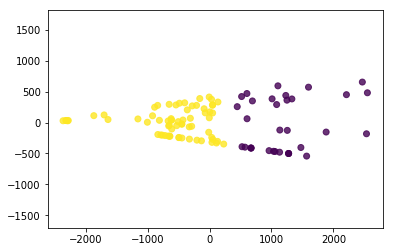

In [28]:
#X_new = pca.inverse_transform(X_pca)
#plt.scatter(X[:, 0], X[:, 1], alpha=0.2)
plt.scatter(X_pca[:, 0], X_pca[:, 1], alpha=0.8, c=y_pred)
plt.axis('equal');

(array([  4.61300000e+03,   6.00000000e+00,   1.50000000e+01,
          6.00000000e+00,   9.00000000e+00,   1.00000000e+01,
          4.00000000e+00,   3.00000000e+00,   3.00000000e+01,
          5.34000000e+02]),
 array([-0.00208951,  0.00252581,  0.00714112,  0.01175643,  0.01637174,
         0.02098705,  0.02560236,  0.03021767,  0.03483298,  0.03944829,
         0.04406361]),
 <a list of 10 Patch objects>)

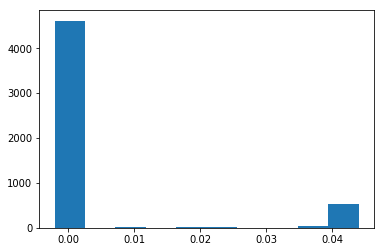

In [29]:
plt.hist(pca.components_[0])

In [1]:
top1000

NameError: name 'top1000' is not defined

In [10]:
import pickle
import pandas as pd

In [3]:
file = open("frDf.pkl",'rb')
frdf = pickle.load(file)
file.close()

In [7]:
fr_set = set(frdf.index)

In [28]:
pheno_strains = pd.read_csv('pheno_strains.csv')
pheno_set = set([x.lower() for x in pheno_strains['STRAIN']])

In [36]:
origins = pd.read_csv('origins.csv')

In [37]:
or_set = set([x.lower() for x in origins['strain']])

In [38]:
print(len(fr_set))
print(len(or_set))
print(len(pheno_set))

100
100
100


In [39]:
fr_set.difference(or_set)

{'yjm1443', 'yjm1615'}

In [43]:
or_set.difference(fr_set)

{'yjm1628', 'yjm1869'}

In [42]:
or_set.difference(pheno_set)

{'yjm1250', 'yjm1388', 'yjm1419', 'yjm1433'}

In [44]:
fr_set.difference(pheno_set)

{'yjm1250', 'yjm1388', 'yjm1419', 'yjm1433', 'yjm1615'}

In [45]:
pheno_set.difference(fr_set)

{'yjm1628', 'yjm1846', 'yjm1847', 'yjm1869', 'yjm1870'}

In [50]:
origins.index = [x.lower() for x in origins['strain']]

In [54]:
data = origins.join(frdf, how='inner').shape